Logistic Regression:

Try different thresholds for computing predictions. By default it is 0.5. Use predict_proba function to compute probabilities and then try custom thresholds and see their impact on Accuracy, Precision and Recall

Do the same analysis for other columns

Fit a Logistic Regression Model on all features. Remember to preprocess data(eg. normalization and one hot encoding)

Plot ROC Curves for each model

Clustering:
Repeat the above exercise for different values of k
How do the inertia and silhouette scores change?
What if you don't scale your features?
Is there a 'right' k? Why or why not?
Repeat the following exercise for food nutrients dataset

Thank you again for your continued participation in the bootcamps and we look forward to seeing your final project presentations.

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import roc_curve, auc
import sklearn.metrics as metrics

In [19]:
data = pd.read_csv('iris.csv')
data.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [20]:
data.Name.value_counts().sort_index()

Name
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

### Try different thresholds for computing predictions. By default it is 0.5. Use predict_proba function to compute probabilities and then try custom thresholds and see their impact on Accuracy, Precision and Recall

In [21]:
y = data.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', 0, 1)

#sepal length and sepal width
X = data.iloc[0:100, [0, 1]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


model = LogisticRegression()
model.fit(X_train, y_train)

proba = model.predict_proba(X_test)[:, 1]

thresholds = [0.05, 0.1, 0.5, 0.75, 0.99]

for threshold in thresholds:
    predict = (proba >= threshold).astype(int)
    
    accuracy = accuracy_score(y_test, predict)
    precision = precision_score(y_test, predict)
    recall = recall_score(y_test, predict)
    
    print(f"A threshold of {threshold:.2f} gives an accuracy of {accuracy:.2f}, a precision of {precision:.2f}, and a recall of {recall:.2f}")

A threshold of 0.05 gives an accuracy of 0.65, a precision of 0.63, and a recall of 1.00
A threshold of 0.10 gives an accuracy of 0.75, a precision of 0.71, and a recall of 1.00
A threshold of 0.50 gives an accuracy of 1.00, a precision of 1.00, and a recall of 1.00
A threshold of 0.75 gives an accuracy of 0.90, a precision of 1.00, and a recall of 0.83
A threshold of 0.99 gives an accuracy of 0.40, a precision of 0.00, and a recall of 0.00


/opt/homebrew/Cellar/jupyterlab/4.2.1/libexec/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Do the same analysis for other columns

A threshold of 0.05 gives an accuracy of 0.75, a precision of 0.71, and a recall of 1.00
A threshold of 0.10 gives an accuracy of 0.95, a precision of 0.92, and a recall of 1.00
A threshold of 0.50 gives an accuracy of 1.00, a precision of 1.00, and a recall of 1.00
A threshold of 0.75 gives an accuracy of 1.00, a precision of 1.00, and a recall of 1.00
A threshold of 0.99 gives an accuracy of 0.40, a precision of 0.00, and a recall of 0.00


/opt/homebrew/Cellar/jupyterlab/4.2.1/libexec/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


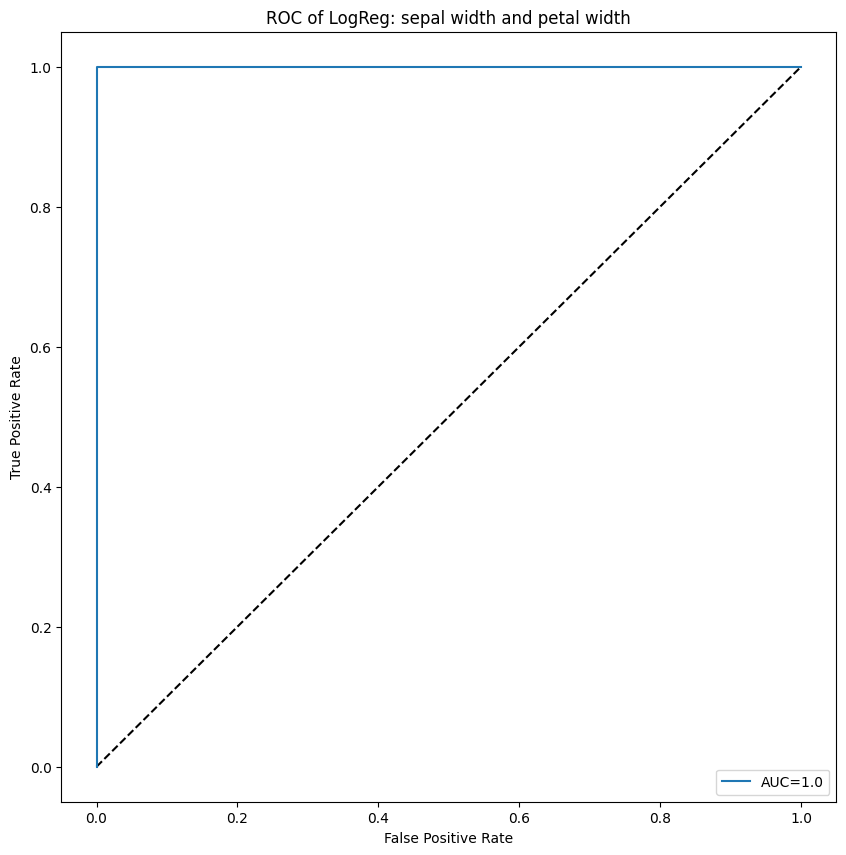

In [26]:
y = data.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', 0, 1)

#sepal width and petal width
X = data.iloc[0:100, [1, 3]]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


model = LogisticRegression()
model.fit(X_train, y_train)

proba = model.predict_proba(X_test)[:, 1]

thresholds = [0.05, 0.1, 0.5, 0.75, 0.99]

for threshold in thresholds:
    predict = (proba >= threshold).astype(int)
    
    # Compute evaluation metrics
    accuracy = accuracy_score(y_test, predict)
    precision = precision_score(y_test, predict)
    recall = recall_score(y_test, predict)
    
    print(f"A threshold of {threshold:.2f} gives an accuracy of {accuracy:.2f}, a precision of {precision:.2f}, and a recall of {recall:.2f}")

fpr, tpr, thresholds = roc_curve(y_test, proba)
plt.plot([0,1],[0,1],'k--')
auc = metrics.roc_auc_score(y_test, proba)

#create ROC curve
plt.title('ROC of LogReg: sepal width and petal width', y=1)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.rcParams['figure.figsize'] = [10,10]
plt.show()

### Fit a Logistic Regression Model on all features. Remember to preprocess data(eg. normalization and one hot encoding)

A threshold of 0.05 gives an accuracy of 0.95, a precision of 0.92, and a recall of 1.00
A threshold of 0.10 gives an accuracy of 1.00, a precision of 1.00, and a recall of 1.00
A threshold of 0.50 gives an accuracy of 1.00, a precision of 1.00, and a recall of 1.00
A threshold of 0.75 gives an accuracy of 1.00, a precision of 1.00, and a recall of 1.00
A threshold of 0.99 gives an accuracy of 0.65, a precision of 1.00, and a recall of 0.42


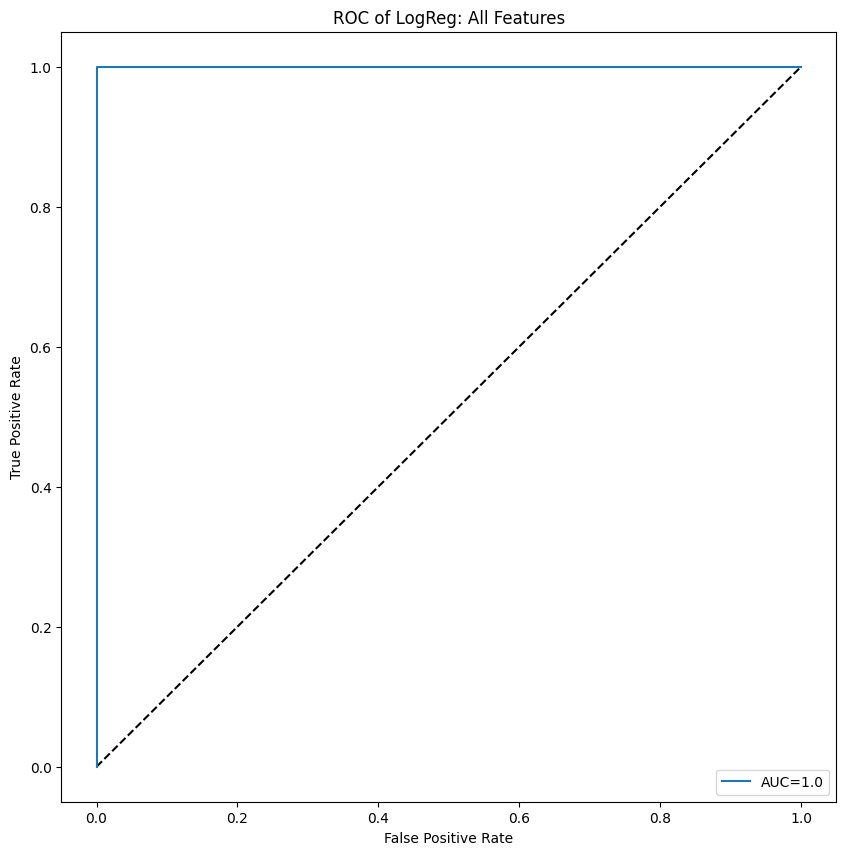

In [24]:
y = data.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', 0, 1)

#all features
X = data.iloc[0:100, [0, 1, 2, 3]]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


model = LogisticRegression()
model.fit(X_train, y_train)

proba = model.predict_proba(X_test)[:, 1]

thresholds = [0.05, 0.1, 0.5, 0.75, 0.99]

for threshold in thresholds:
    predict = (proba >= threshold).astype(int)
    
    # Compute evaluation metrics
    accuracy = accuracy_score(y_test, predict)
    precision = precision_score(y_test, predict)
    recall = recall_score(y_test, predict)

    print(f"A threshold of {threshold:.2f} gives an accuracy of {accuracy:.2f}, a precision of {precision:.2f}, and a recall of {recall:.2f}")

fpr, tpr, thresholds = roc_curve(y_test, proba)
plt.plot([0,1],[0,1],'k--')
auc = metrics.roc_auc_score(y_test, proba)

#create ROC curve
plt.title('ROC of LogReg: All Features', y=1)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.rcParams['figure.figsize'] = [10,10]
plt.show()